# Spacecraft Trajectories using Google Earth
Python is a useful programming language for performing engineering anaylses. One of the major reasons for this is the large number of readily available open-source libraries. The powerful combination of the open source tools [virtualenv](https://virtualenv.pypa.io/en/stable/) and [pip](https://pypi.org/project/pip/) make it easy to bring in open-source modules found on websites like [GitHub](https://github.com/). This allows the developer to focus on their specific task at hand by relying on modules for much of the heavy lifting. In short, it allows you to be productive.

As an example, we will use Python to generate 3D visualizations of spacecraft trajectories in Google Earth. By the end of this assignment, you will have an understanding of how to leverage freely available Python libraries to quickly perform useful engineering analyses with Trick simulation data. 

### Packages to be used in this assignment
* [numpy](http://www.numpy.org/) 
  * NumPy is the fundamental package for scientific computing with Python
* [matplotlib](https://matplotlib.org/)
  * Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
* [pyKML](https://pythonhosted.org/pykml/) 
  * PyKML is a Python package for creating, parsing, manipulating, and validating KML, a language for encoding and annotating geographic data. Used by Google Earth.

<style>
img {
  filter: drop-shadow(4px 4px 3px grey);
  align: center;
}
</style>
<center>
<img src="imgs/trajectories.png" alt="Spacecraft Trajectories" style="width: 500px;"/>
</center>

## Problem Statement
Let's imagine our customer has come to us with the following request: 

** " ** *I have all these spacecraft abort trajectories from your wonderful Trick simulation. I have analyzed them and assesed the spacecraft performance against the requirements we have levied on our vendor. I am putting together a presentation for my management that captures this information in pain-staking detail. However, I'd really just like a simple 3D visualization to help provide some context at the beginning of my slides. How can we do that quickly and cheaply with the data you have provided?* ** " **

Using standard Python modules and the freely available ones listed above, let's respond to this customer's request within a few hours.

## Environment Setup
Download and extract TrajectoriesAssignment.zip to your home folder. Follow these steps to set up your environment.

### CentOS
```shell
sudo yum install python-pip
sudo pip install virtualenv
virtualenv -p /usr/bin/python2.7 ~/venv
source ~/venv/bin/activate
cd ~/TrajectoriesAssignment
pip install -r requirements.txt 
cd tests/
nosetests
```
Expected output is the following.
```shell
AssertionError: 0.0 != 2661.47322 within 4 places

----------------------------------------------------------------------
Ran 10 tests in 0.007s

FAILED (errors=1, failures=5)
```


### Ubuntu
```shell
sudo apt-get install python-pip
sudo pip install virtualenv
virtualenv -p /usr/bin/python2.7 ~/venv
source ~/venv/bin/activate
cd ~/TrajectoriesAssignment
pip install -r requirements.txt 
cd tests/
nosetests
```
Expected output is the following.
```shell
AssertionError: 0.0 != 2661.47322 within 4 places

----------------------------------------------------------------------
Ran 10 tests in 0.007s

FAILED (errors=1, failures=5)
```

### Suggested Approach
Break this problem in to pieces that build upon each other. Make a plan for how to keep your code organized. Use the knowledge you have gained thus far in Object Oriented Analysis and Design. This problem can be solved fairly easily if it's broken into manageable modules that build upon each other to form your final application.

1. Read the Trick Monte Carlo simulation ASCII data into a Python data structure to enable convenient programmatic manipulation.
  * Write a function to read a single trajectory file and create a Python dictionary to hold the trajectory contents.
  * Write a function to read all the trajectory files in a given Trick Monte Carlo output data folder into a single dictionary indexed by the run name.
2. Create a trajectory container class and the following member functions
  * Construct the trajectory from a given ASCII file. Use your function from part 1.
  * Provide an optional constructor argument to convert the lat/long to degrees/radians.
  * Using numpy, create the following properties for your class: PeakAltitude, AverageLatitude, AverageLongitude
3. Create a 3D plot of the altitude, latitude, and longitude of a single trajectory using a 
   library like matplotlib.
4. BONUS: Research pyKML and use it to write out a KML file containing your trajectory trace that you can open in Google Earth.

## Part 1
Your goal for part 1 is to construct a Python dictionary from a Trick ASCII file (CSV). Let's use test driven development to develop your solution. I have provided a set of unit tests below. Develop your solution iteratively by getting each unit test to pass.

### Hints
* Beware that Trick adds some extra information in the CSV header
* Read about [TDD](https://code.tutsplus.com/tutorials/beginning-test-driven-development-in-python--net-30137)
* [CSV](https://docs.python.org/2/library/csv.html) module
* [OS](https://docs.python.org/2/library/os.html) module
* [glob](https://docs.python.org/2/library/glob.html) module for getting a list of files with a given extension

### Unit Tests for Part 1
``` python
from unittest import TestCase
import os, sys
# Allows us to import our modules
sys.path.append(os.path.join('../', 'modules'))

class TestPart1(TestCase):
    def test_parse_trick_ascii(self):
        from TrickSimData import parse_trick_ascii
        sim_data = parse_trick_ascii(os.path.join('..', 'sample_data','sample_run.csv'))
        self.assertAlmostEquals(sim_data['altitude'][0], 48.08326, 4)
        self.assertAlmostEquals(sim_data['latitude'][0], 0.49930, 4)
        self.assertAlmostEquals(sim_data['longitude'][0], -1.4068, 4)

    def test_parse_single_run(self):
        from TrickSimData import SingleRun
        sim_data = SingleRun(sim_data_dir=os.path.join('..', 'sample_data'), dr_group="sample_run")
        self.assertAlmostEquals(sim_data['altitude'][0], 48.08326, 4)
        self.assertAlmostEquals(sim_data['latitude'][0], 0.49930, 4)
        self.assertAlmostEquals(sim_data['longitude'][0], -1.4068, 4)

    def test_parse_mc_data(self):
        from TrickSimData import MonteCarloRun
        sim_data = MonteCarloRun(sim_data_dir=os.path.join('..', 'sample_data',
                                                           'sample_mc_data'), dr_group="sample_run")
        self.assertAlmostEquals(sim_data['RUN_00000']['altitude'][0], 48.08326, 4)
        self.assertAlmostEquals(sim_data['RUN_00001']['altitude'][100], 1304.3468, 4)
        self.assertAlmostEquals(sim_data['RUN_00000']['latitude'][0], 0.49930, 4)
        self.assertAlmostEquals(sim_data['RUN_00000']['longitude'][0], -1.4068, 4)
```
It is also wise to test test some edge cases. As an example, what happens when you pass a bad file name? See the tests folder included in the TrajectoriesAssignment directory for a complete list of tests that you should try to get passing for part 1.

## Part 2
Your goal for part 2 is to create a trajectory container class called Trajectory. This container class should take some constructor arguments and implement a few class [properties](https://www.programiz.com/python-programming/property). Here's a set of tests to excercise your class. See the tests folder included in the TrajectoriesAssignment directory for a complete list of tests that you should try to get passing for part 2.

### Hints
* [numpy](www.numpy.org/) module for max, min, and mean
* [math](https://docs.python.org/2/library/math.html) module for math.degrees() and math.radians()

### Unit Tests for Part 2
``` python
from unittest import TestCase
import os, sys
# Allows us to import our modules
sys.path.append(os.path.join('../', 'modules'))

class TestPart2(TestCase):
    def test_AverageLatitude(self):
        from TrickSimData import SingleRun
        from TrajectoryUtils import Trajectory
        sim_data = SingleRun(sim_data_dir=os.path.join('..', 'sample_data'), dr_group="sample_run")
        test_trajectory = Trajectory(name="RUN_1",
                              alt= sim_data["altitude"],
                              lat= sim_data["latitude"],
                              lon= sim_data["longitude"],
                              convert_degrees=True)
        self.assertAlmostEquals(test_trajectory.AverageLatitude, 28.6133, 4)

    def test_AverageLongitude(self):
        from TrickSimData import SingleRun
        from TrajectoryUtils import Trajectory
        sim_data = SingleRun(sim_data_dir=os.path.join('..', 'sample_data'), dr_group="sample_run")
        test_trajectory = Trajectory(name="RUN_1",
                              alt= sim_data["altitude"],
                              lat= sim_data["latitude"],
                              lon= sim_data["longitude"],
                              convert_degrees=True)
        self.assertAlmostEquals(test_trajectory.AverageLongitude, -80.6000, 4)

    def test_PeakAlititude(self):
        from TrickSimData import SingleRun
        from TrajectoryUtils import Trajectory
        sim_data = SingleRun(sim_data_dir=os.path.join('..', 'sample_data'), dr_group="sample_run")
        test_trajectory = Trajectory(name="RUN_1",
                              alt= sim_data["altitude"],
                              lat= sim_data["latitude"],
                              lon= sim_data["longitude"])
        self.assertAlmostEquals(test_trajectory.PeakAltitude, 2661.47322, 4)
```

## Part 3
Plotting using matplotlib is pretty straight-forward usually. Throwing something together can be done quickly. However, it can take some time to tweak your plots to get them just how you want them. The usual workflow is to rely heavily on the matplotlib examples, Google searches, and Stack Overflow.

You can find a fantastic matplotlib tutorial here.

And, if that wasn't enough, here's some starter code relevant to this assignment. Experiment with this... for one, those axes look terrible!

In [7]:
%matplotlib inline
import sys, os
import pylab as plt
from mpl_toolkits import mplot3d

In [8]:
from modules.TrickSimData import MonteCarloRun
from modules.TrajectoryUtils import TrajectoryBundle

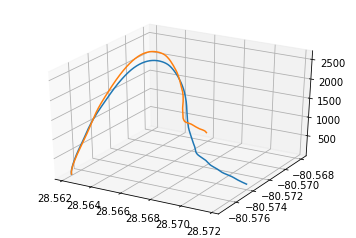

In [9]:
sim_data_dir = os.path.abspath(os.path.join('sample_data', 'sample_mc_data'))
sim_data = MonteCarloRun(sim_data_dir=sim_data_dir, dr_group="sample_run")
traj_bundle = TrajectoryBundle(trajectory_data=sim_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in traj_bundle:
    ax.plot(traj.Latitudes, traj.Longitudes, traj.Altitudes)

## Part 4
Perhaps surprisingly, visualizing these trajectories using Google Earth is not so hard. All that we need to do is generate a KML file from our trajectory and then open that file using Google Earth. That begs the question: How do we write a KML file?

The key to that is a library called [pyKML](https://pythonhosted.org/pykml/). Follow the link to this [example](). Spend a little time reading the library's online documentation. It is helpful to realize that pyKML is a just special flavor of XML that is commonly used in mapping software.

Finally, it helps to know where you're going. A snippet from a working trajectory KML file is provided below. Your code should try to produce a file like this one. Hint: use one Placemark element per trajectory.

``` xml
<kml xmlns:atom="http://www.w3.org/2005/Atom" xmlns:gx="http://www.google.com/kml/ext/2.2" xmlns="http://www.opengis.net/kml/2.2">
  <Document>
    <name>trajectories.kml</name>
    <Placemark>
      <name>RUN_00000</name>
      <visibility>1</visibility>
      <description></description>
      <Style>
        <LineStyle>
          <color>FF1400FF</color>
          <width>2.0</width>
        </LineStyle>
        <PolyStyle>
          <color>00ffffff</color>
        </PolyStyle>
      </Style>
      <Polygon>
        <extrude>0</extrude>
        <altitudeMode>absolute</altitudeMode>
        <outerBoundaryIs>
          <extrude>0</extrude>
          <LinearRing>
            <extrude>0</extrude>
            <tessellate>0</tessellate>
            <altitudeMode>absolute</altitudeMode>
            <coordinates>-80.60412530197159,28.608295919486633,48.08326751005924
-80.60412530283247,28.6082959186076,48.13694587766073
-80.60412530362309,28.60829591707697,48.22038344799937
 <!--         ...            -->
 <!-- Many More Co-ordinates -->
 <!--         ...            -->
-80.60030017382053,28.617846585087722,0.6681277604836572
-80.60030003674713,28.61785412574746,-0.06469062573816126
</coordinates>
          </LinearRing>
        </outerBoundaryIs>
      </Polygon>
    </Placemark>

 <!-- You can add more trajectories by adding more Placemark elements -->

    <LookAt>
      <longitude>-80.59823281189256</longitude>
      <latitude>28.61213482085703</latitude>
      <heading>-20.0</heading>
      <tilt>82.5</tilt>
      <range>9315.156288943628</range>
      <gx:altitudeMode>absolute</gx:altitudeMode>
    </LookAt>
  </Document>
</kml>
```

## Conclusion
By now you should be looking at your trajectories in Google Earth. If not, and you would like some help, contact michael.moore@nasa.gov. It is not hard to imagine how to extend your code to do even more useful analysis using matplotlib and/or Google Earth. Python, and the freely available modules you get access to using pip, are amazing tools for a scientist or engineer. It allows the developer to quickly stitch together custom and freely available modules to compose a solution to a practical problem. The interactive nature of Python lends itself to  experimentation and rapid prototyping. Hopefully this assignment has both challenged and inspired you to learn more about Python. You won't regret it!

### Special Thanks
Thanks to these individuals for their help in putting together this material:
* Matthew Scarborough
* Scott Fennel
* John Penn

## References
Here's a list of useful resources for more information.

1. [Ten Famous Python Applications](http://www.hartmannsoftware.com/Blog/Articles_from_Software_Fans/Most-Famous-Software-Programs-Written-in-Python)
2. [The Incredible Growth of Python](https://stackoverflow.blog/2017/09/06/incredible-growth-python/)
3. [Why Test Driven Development](https://medium.com/@gondy/the-importance-of-test-driven-development-f80b0d02edd8)
4. [How to do Test Driven Development in Python](https://code.tutsplus.com/tutorials/beginning-test-driven-development-in-python--net-30137)
5. [Python IDE Options](http://www.it4nextgen.com/7-best-ides-for-python-programming-in-2018/)
6. [Virtual Environments](https://virtualenv.pypa.io)
7. [Pip](https://pypi.org/project/pip/)
8. [General Python Tutorial](http://www.scipy-lectures.org/intro/language/python_language.html)
8. [Modules and Code Re-Use](http://www.scipy-lectures.org/intro/language/reusing_code.html)
9. [Object Oriented Programming](http://www.scipy-lectures.org/intro/language/oop.html)
10. [Great Matplotlib Tutorial]()
11. [Jupyter Notebook Tutorial]()